*Obesity Prediction using XGBOOST*

You  can download the dataset from Kaggle
Link : https://www.kaggle.com/competitions/playground-series-s4e2/data

In [4]:

!pip install xgboost


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier

In [6]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [7]:
data_train.shape

(20758, 18)

In [8]:
data_test.shape

(13840, 17)

In [9]:
data_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
data_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
data_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
data_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [13]:
# counting number of missing values in the train set
df = pd.DataFrame(data_train)
missing_val_train = df.isnull().sum()

print("Missing values in data :")
print(missing_val_train[missing_val_train > 0])

Missing values in data :
Series([], dtype: int64)


In [14]:
# counting number of missing values in the test set
df_test = pd.DataFrame(data_test)
missing_val_test = df_test.isnull().sum()

print("Missing values in data :")
print(missing_val_test[missing_val_test > 0])

Missing values in data :
Series([], dtype: int64)


In [15]:
# Identifying numerical columns in train set
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [16]:
# Show unique values in categorical columns in train set
for column in categorical_cols:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Frequently' 'no' 'Always']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Unique values in 'NObeyesdad': ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [17]:

# Identifying numerical columns in test set
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns in test set
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols_test)
print("Categorical Columns:", categorical_cols_test)

Numerical Columns: Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [18]:
# Show unique values in categorical columns in test set
for column in categorical_cols_test:
    print(f"Unique values in '{column}': {df_test[column].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Always' 'Frequently' 'no']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently' 'Always']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


In [19]:
# Replace categorical values with numerical values in the train set
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0})
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].replace({'yes': 1, 'no': 0})
df['CAEC'] = df['CAEC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df['CALC'] = df['CALC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df['MTRANS'] = df['MTRANS'].replace({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Bike': 3, 'Motorbike': 4})
df['NObeyesdad'] = df['NObeyesdad'].replace({
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
})
# OneHot encoding the gender feature
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

# Joining the new one-hot encoded columns back to the original DataFrame
df = pd.concat([df, gender_dummies], axis=1)

# Drop the original columns
df.drop('Gender', axis=1, inplace=True)

C:\Users\yuvas\AppData\Local\Temp\ipykernel_7664\3184764572.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
C:\Users\yuvas\AppData\Local\Temp\ipykernel_7664\3184764572.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0})
C:\Users\yuvas\AppData\Local\Temp\ipykernel_7664\3184764572.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

In [20]:
# Replace categorical values with numerical values in the train set
df_test['family_history_with_overweight'] = df_test['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df_test['FAVC'] = df_test['FAVC'].replace({'yes': 1, 'no': 0})
df_test['SMOKE'] = df_test['SMOKE'].replace({'yes': 1, 'no': 0})
df_test['SCC'] = df_test['SCC'].replace({'yes': 1, 'no': 0})
df_test['CAEC'] = df_test['CAEC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df_test['CALC'] = df_test['CALC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df_test['MTRANS'] = df_test['MTRANS'].replace({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Bike': 3, 'Motorbike': 4})

# OneHot encoding the gender feature
gender_dummies = pd.get_dummies(df_test['Gender'], prefix='Gender')

# Joining the new one-hot encoded columns back to the original DataFrame
df_test = pd.concat([df_test, gender_dummies], axis=1)
# Drop the original columns
df_test.drop('Gender', axis=1, inplace=True)

C:\Users\yuvas\AppData\Local\Temp\ipykernel_7664\3712632159.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['family_history_with_overweight'] = df_test['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
C:\Users\yuvas\AppData\Local\Temp\ipykernel_7664\3712632159.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['FAVC'] = df_test['FAVC'].replace({'yes': 1, 'no': 0})
C:\Users\yuvas\AppData\Local\Temp\ipykernel_7664\3712632159.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and w

In [21]:
df_test.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_Female,Gender_Male
0,20758,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,0,False,True
1,20759,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,0,True,False
2,20760,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,0,True,False
3,20761,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,0,False,True
4,20762,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,0,True,False


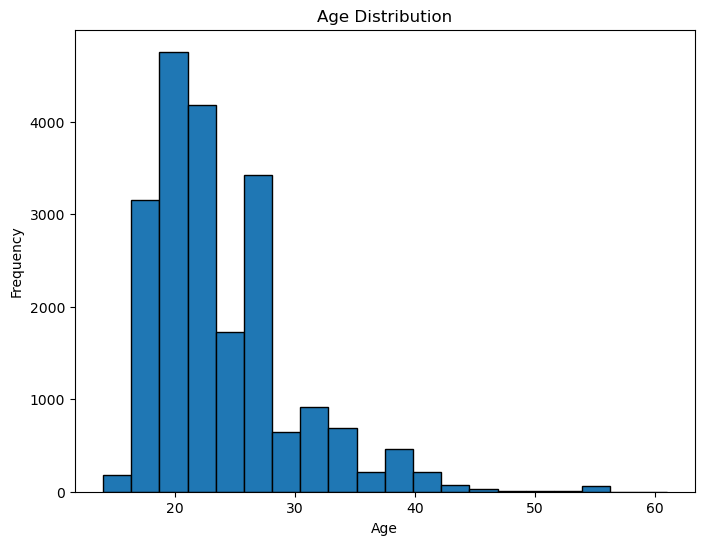

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
co_relation = numeric_data.corr()
co_relation
sns.heatmap(co_relation)

In [25]:
# Define features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Initialize the XGBoost classifier.
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    colsample_bytree=1.0,
    subsample=1.0,
    min_child_weight=1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model.
xgb_model.fit(X, y)

C:\Users\yuvas\conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
pred = pd.DataFrame()
pred['id']=df_test['id'].astype(int)
pred['NObeyesdad'] = xgb_model.predict(df_test)
# Replace the numerical values predicted to categorical values
pred['NObeyesdad'] = pred['NObeyesdad'].replace({
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
})
#pred.to_csv('submission.csv',index=False)
pred

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
